In [2]:
import numpy as np
import pandas as pd

## Part 0. Upload text data

In [3]:
import csv
text = []
with open('data1.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        text.append(row)

In [4]:
type(text)

list

In [5]:
len(text)

352024

In [49]:
text[0]

['\ufeffStately',
 ' plump Buck Mulligan came from the stairhead',
 ' bearing a bowl of',
 '',
 '',
 '',
 '',
 '']

## Part 1. Data cleansing and frequency

In [7]:
import re

### Remove empty lines, numbers, special characters (but period)

In [50]:
# remove empty lines

text1 = []

for i in range(len(text)):
    for j in range(len(text[i])):
        if text[i][j] != '':
            text1.append(text[i][j])

In [9]:
len(text1)

493855

In [10]:
# remove numbers and special characters, except for period
text2 = [re.sub('[^a-zA-Z.]', ' ', item).strip() for item in text1]

### Add a single space before every period

In [12]:
text3 = [re.sub('[.]', ' .', item).strip() for item in text2]

### Find total number of words

In [14]:
# split the element by space (more than one space)
text4 =[]
for item in text3:
    a = re.split("\s+", item)
    for i in a:
        text4.append(i)

In [16]:
#total number of words
len(text4)

2977406

### Top 10 most frequently occurred words

In [17]:
from collections import Counter

In [18]:
vocab = Counter(text4)

In [19]:
# TOP 10 frequently occured words
top10 = vocab.most_common(10)
top10

[('the', 210842),
 ('and', 131624),
 ('of', 117059),
 ('.', 109217),
 ('to', 50935),
 ('in', 44873),
 ('that', 42239),
 ('And', 39389),
 ('he', 35158),
 ('a', 33666)]

## Part 2. Counting/Frequency

In [20]:
print('The frequency of the word city:', vocab['city'])
print('The frequency of the word there:', vocab['there'])
print('The frequency of the word period(.):', vocab['.'])

The frequency of the word city: 2752
The frequency of the word there: 7441
The frequency of the word period(.): 109217


### Compute the conditional probability of "I will"

In [21]:
vocab['I']

32539

In [22]:
vocab['will']

12651

In [23]:
# frequency of the sequence 'I will'
count = 0
for (index, word) in enumerate(text4):
    if word == 'I':
        if text4[index+1] == 'will':
            count +=1
count

6038

- Since the frequency of the word "I" is 32,539 and the frequency of the phrase "I will" is 6,038, the conditional probability P(will | I) is 6038/32539 = 0.1856 

## Part 3. Histogram

### histogram of all the words that occured

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
word_freq_df = pd.DataFrame(vocab.most_common())
word_freq_df.columns = ['words','count']

In [52]:
word_freq_df.head()

,words,count
0,the,210842
1,and,131624
2,of,117059
3,.,109217
4,to,50935


Text(0.5, 1.0, 'Top 30 Frequently occured words')

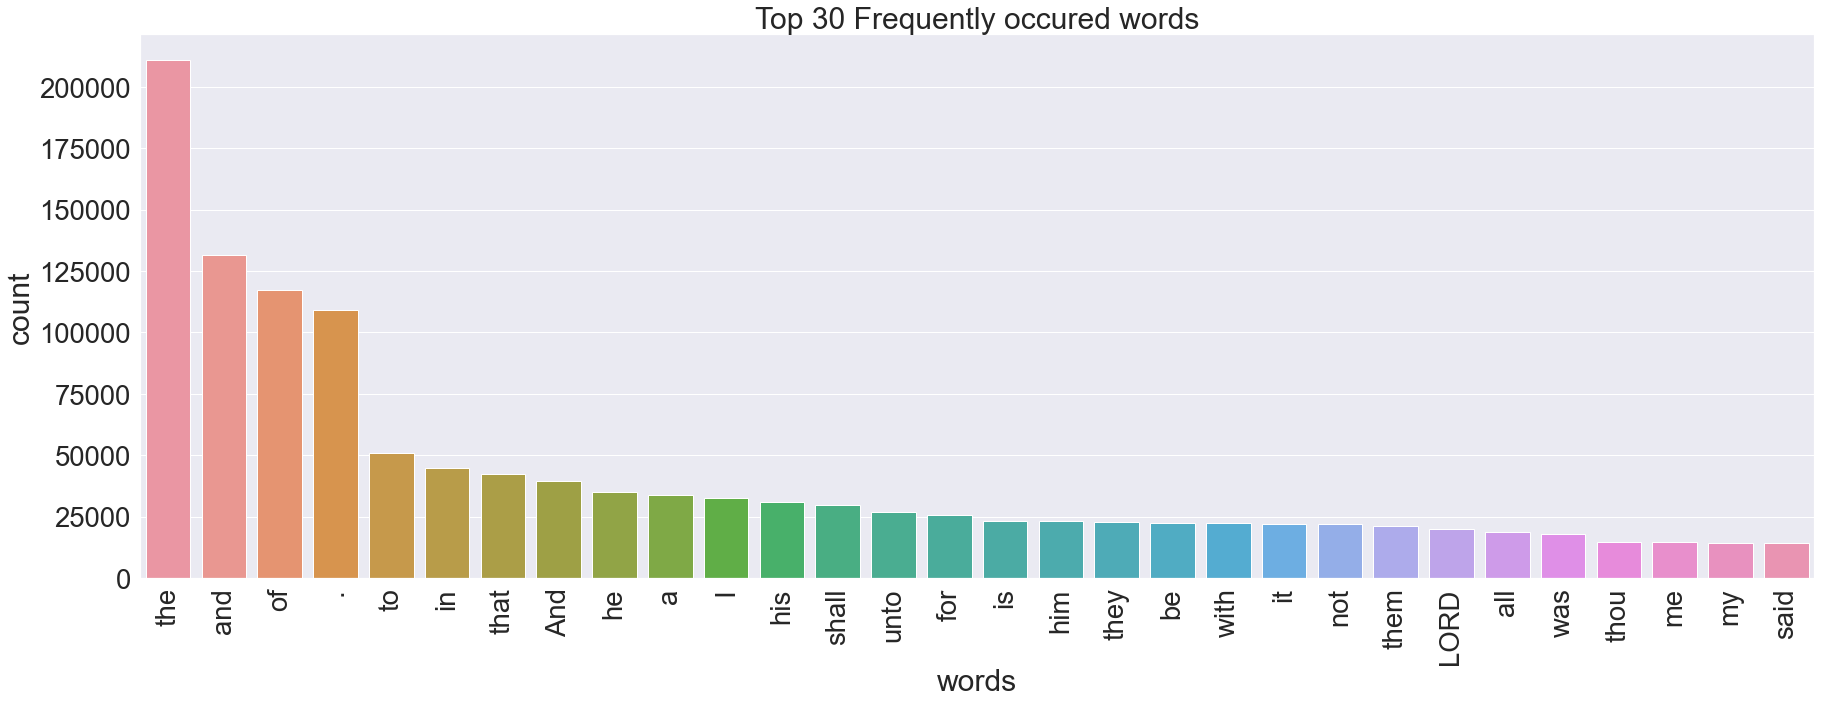

In [33]:
# histogram
sns.set(font_scale = 2.5)
plt.figure(figsize = (30,10))
h = sns.barplot(x = 'words', y = 'count', data = word_freq_df.iloc[0:30])
h.set_xticklabels(h.get_xticklabels(),rotation = 90)
h.set_title('Top 30 Frequently occured words')

### Top 10 most frequently occured two-word sequence

In [53]:
text5 = []
for i in range(len(text4)-1):
    two = text4[i] + ' ' + text4[i+1]
    text5.append(two)

In [35]:
# ruling out sequences that contain a period
text5_noperiod = []
for i in text5:
    if re.findall('[.]', i) == []: # if the sequence does not contain a period
        text5_noperiod.append(i)

In [36]:
len(text5)

2977405

In [37]:
len(text5_noperiod)

2759529

In [38]:
# most common two word sequence (including a period)
two_seq = Counter(text5)
top10_seq = two_seq.most_common(10)
top10_seq

[('of the', 37119),
 ('. And', 31873),
 ('the LORD', 17892),
 ('in the', 16890),
 ('and the', 13029),
 ('to the', 7738),
 ('shall be', 7436),
 ('And the', 6728),
 ('all the', 6644),
 ('unto the', 6063)]

In [39]:
# most common two word sequence (not including a period)
two_seq_noperiod = Counter(text5_noperiod)
top10_seq_noperiod = two_seq_noperiod.most_common(10)
top10_seq_noperiod

[('of the', 37119),
 ('the LORD', 17892),
 ('in the', 16890),
 ('and the', 13029),
 ('to the', 7738),
 ('shall be', 7436),
 ('And the', 6728),
 ('all the', 6644),
 ('unto the', 6063),
 ('I will', 6038)]

### Histogram of the frequency of two word sequences

In [40]:
seq_freq_df = pd.DataFrame(two_seq_noperiod.most_common())
seq_freq_df.columns = ['words','count']

Text(0.5, 1.0, 'Top 30 Frequently occured two word sequences')

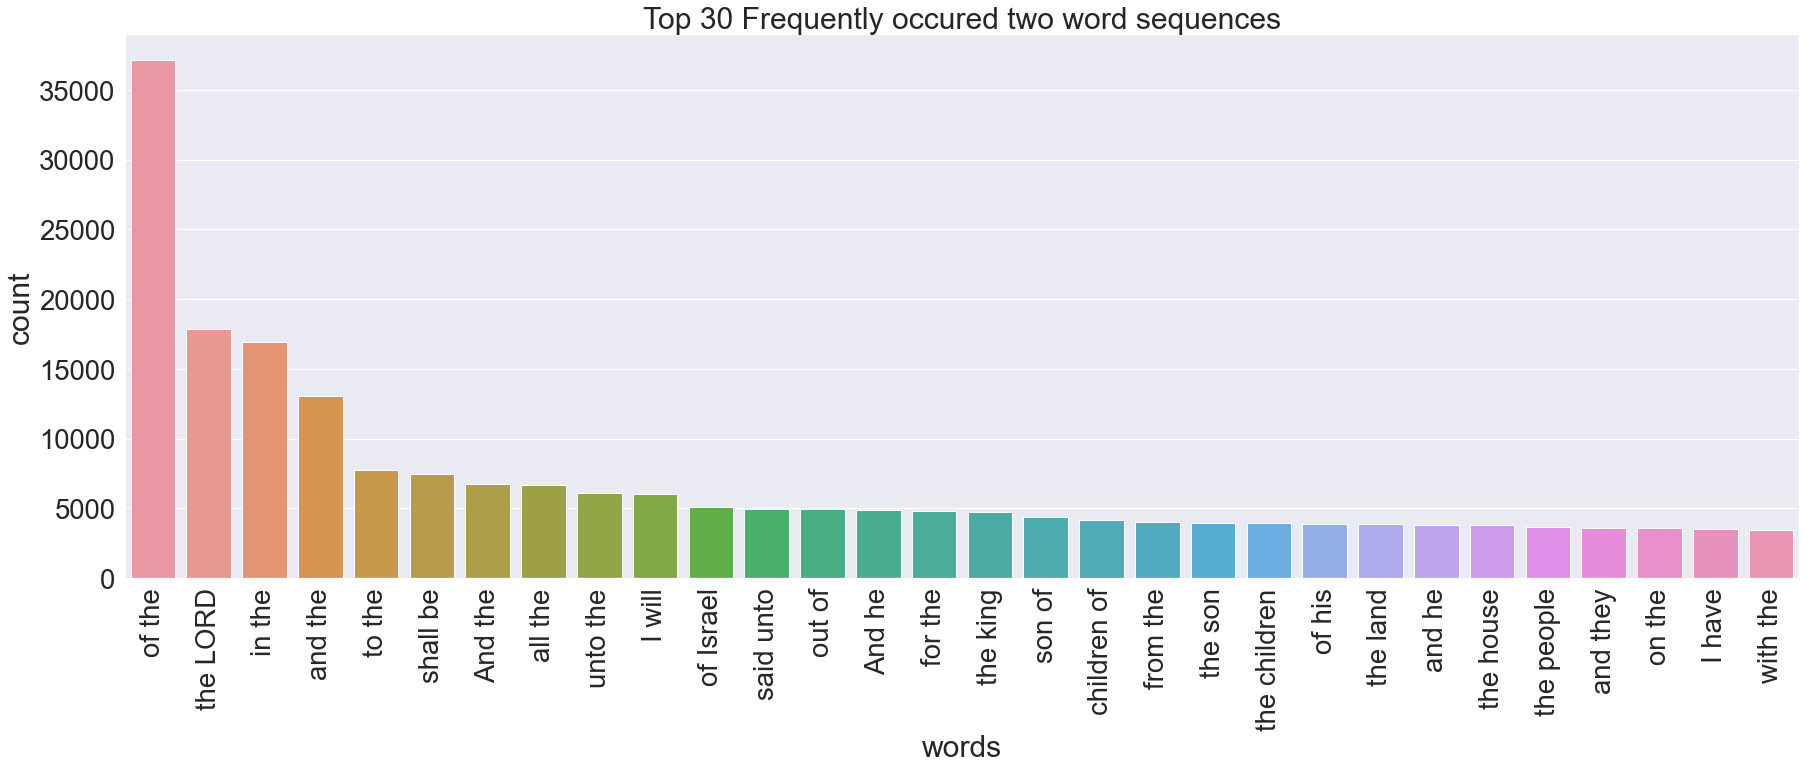

In [41]:
#histogram
sns.set(font_scale = 2.5)
plt.figure(figsize = (30,10))
h = sns.barplot(x = 'words', y = 'count', data = seq_freq_df.iloc[0:30])
h.set_xticklabels(h.get_xticklabels(),rotation = 90)
h.set_title('Top 30 Frequently occured two word sequences')

### Top 5 most frequently occured four-word sequence

In [54]:
text6 = []
for i in range(len(text4)-3):
    four = text4[i] + ' ' + text4[i+1]+' '+text4[i+2] + ' '+text4[i+3]
    text6.append(four)

In [43]:
#ruling out sequences that contain a period
text6_noperiod = []
for i in text6:
    if re.findall('[.]', i) == []:
        text6_noperiod.append(i)

In [44]:
# most common four word sequence (including a period)
four_seq = Counter(text6)
top5_four_seq = four_seq.most_common(5)
top5_four_seq

[('the children of Israel', 1908),
 ('it came to pass', 1354),
 ('And it came to', 1149),
 ('. And it came', 1113),
 ('. And the LORD', 1101)]

In [45]:
# most common four word sequence (not including a period)
four_seq_noperiod = Counter(text6_noperiod)
top5_four_seq_noperiod = four_seq_noperiod.most_common(5)
top5_four_seq_noperiod

[('the children of Israel', 1908),
 ('it came to pass', 1354),
 ('And it came to', 1149),
 ('of the children of', 1068),
 ('the LORD thy God', 873)]

In [47]:
seq4_freq_df = pd.DataFrame(four_seq_noperiod.most_common())
seq4_freq_df.columns = ['words','count']

Text(0.5, 1.0, 'Top 30 Frequently occured four word sequences')

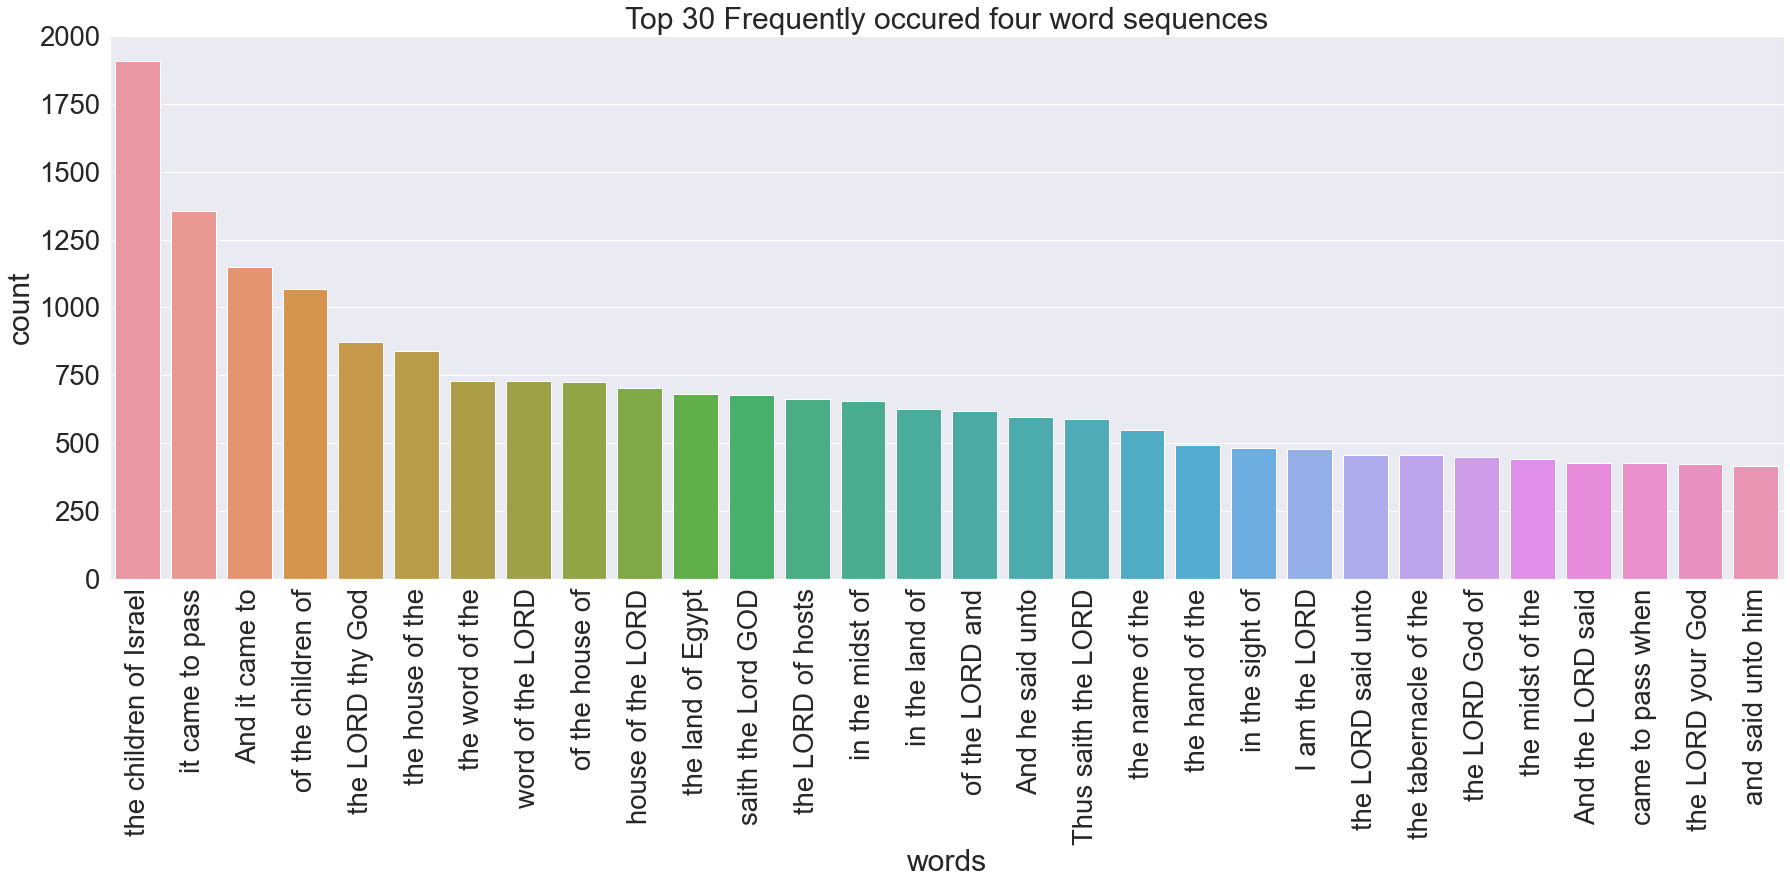

In [48]:
#histogram
plt.figure(figsize = (30,10))
sns.set(font_scale = 2.5)
h = sns.barplot(x = 'words', y = 'count', data = seq4_freq_df.iloc[0:30])
h.set_xticklabels(h.get_xticklabels(),rotation = 90)
h.set_title('Top 30 Frequently occured four word sequences')